# ML code written on Oct,4-9 ,2022
wawfmp15222

->I use the book :/home/muna/Documents/ pandas in 172 pages +
-> https://www.kaggle.com/code/raushankumarpandey/a-complete-pandas-tutorial As a guide +
-> my previous code from : https://github.com/muna-mohammed/diamonds-EDA
-> tutorial about correlation from: https://stackabuse.com/bytes/calculate-correlation-of-dataframe-featurescolumns-with-pandas/ -> skew() function from: https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

the dataset is from : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats

/home/muna/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
data = pd.read_csv(r"/home/muna/Downloads/datasets/New York City property sales.csv")

# the basics

In [3]:
data.head()
# print first 5 rows

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
data.tail()
# by defult print last 5 rows

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [6]:
data.dtypes
# this super important to use it , for converting between data types i.e make all columns numeric 
# it is so useful when we split the data

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [7]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
data.shape
# the shape of whole dataset (no. rows,no. column)

(84548, 22)

In [9]:
data.columns
# columns names

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [10]:
data['SALE PRICE'].describe()
# ues describe with specific column

count     84548
unique    10008
top         -  
freq      14561
Name: SALE PRICE, dtype: object

In [11]:
data['TAX CLASS AT PRESENT'].value_counts()
# counts how much each value is occur in each column

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [12]:
data['NEIGHBORHOOD'].value_counts()

FLUSHING-NORTH               3068
UPPER EAST SIDE (59-79)      1736
UPPER EAST SIDE (79-96)      1590
UPPER WEST SIDE (59-79)      1439
BEDFORD STUYVESANT           1436
MIDTOWN EAST                 1418
BOROUGH PARK                 1245
ASTORIA                      1216
BAYSIDE                      1150
FOREST HILLS                 1069
SHEEPSHEAD BAY               1013
UPPER WEST SIDE (79-96)      1004
JACKSON HEIGHTS               992
EAST NEW YORK                 982
MIDTOWN WEST                  918
FLUSHING-SOUTH                918
HARLEM-CENTRAL                847
FLATBUSH-EAST                 846
BAY RIDGE                     832
CHELSEA                       803
ELMHURST                      802
CROWN HEIGHTS                 793
CANARSIE                      783
GREAT KILLS                   776
BUSHWICK                      769
RICHMOND HILL                 749
REGO PARK                     721
PARK SLOPE                    706
GRAVESEND                     705
TRIBECA       

In [13]:
data['SALE PRICE'].value_counts()

 -          14561
0           10228
10            766
450000        427
550000        416
650000        414
600000        409
700000        382
400000        378
750000        377
300000        351
500000        350
350000        345
800000        331
900000        324
250000        314
850000        309
950000        301
1100000       298
1200000       286
1300000       271
425000        265
475000        259
525000        259
325000        249
480000        233
1250000       229
625000        224
200000        223
460000        222
            ...  
7571300         1
740500          1
2730910         1
1346400         1
727650          1
31200           1
612700          1
414225          1
835779          1
1493000         1
338006          1
418782          1
1410772         1
2163100         1
582924          1
61195           1
1097406         1
4724680         1
774143          1
193400          1
3485000         1
652250          1
43305           1
13950000        1
3238038   

In [14]:
data['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
1950    3156
1960    2654
1940    2456
1931    2246
1955    1961
1899    1798
1901    1755
1935    1610
1965    1511
2015    1470
1945    1330
2014    1232
2007    1186
1915    1182
1900    1130
2005    1106
1970     952
1963     941
2008     935
2006     924
1962     839
2016     794
2013     743
1961     728
2004     715
        ... 
1894       5
1892       4
1845       4
1871       3
1852       3
1891       3
1854       3
1898       3
1875       3
1844       2
1865       2
1893       2
1889       2
1846       2
1856       2
1883       2
1851       2
1847       2
1882       2
1835       2
1840       2
1864       2
1680       1
1855       1
1826       1
1832       1
1849       1
1829       1
1111       1
1888       1
Name: YEAR BUILT, Length: 158, dtype: int64

In [15]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# null values

In [16]:
data.isnull().sum()
# all the null values in each column

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Renaming columns

In [17]:
data = data.rename(columns={'Unnamed: 0': 'No. of house'})

In [18]:
data.head()

,No. of house,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# visulazation

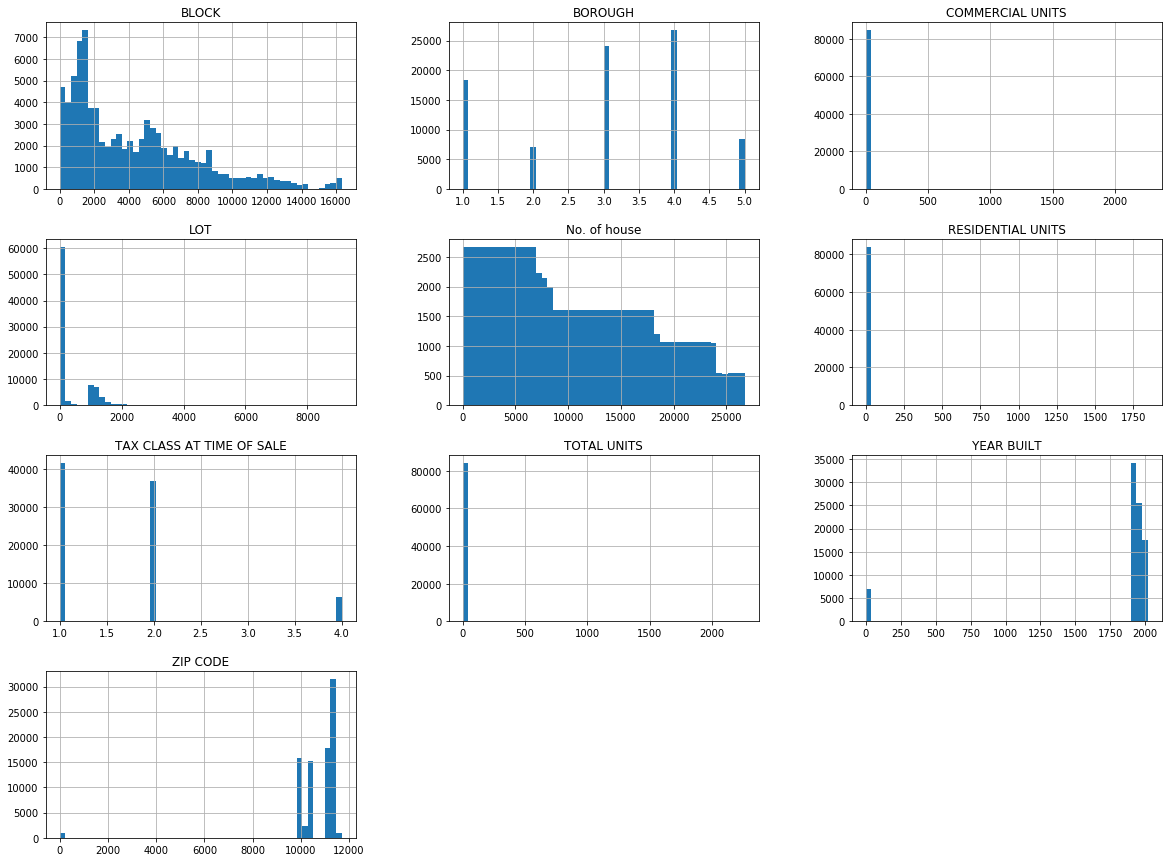

In [19]:
data.hist(bins=50 , figsize=(20,15))
plt.show()

# Slicing DataFrame

In [20]:
sale_price = data[data['SALE PRICE'] == '450000']
sale_price

,No. of house,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18,22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,49,,C6,"311 EAST 3RD STREET, 17",...,0,0,0,-,-,1920,2,C6,450000,2016-09-01 00:00:00
33,37,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,389,50,,C6,"621 EAST 6TH STREET, 6",...,0,0,0,-,-,1920,2,C6,450000,2016-12-02 00:00:00
34,38,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2C,389,50,,C6,"621 EAST 6TH STREET, 10",...,0,0,0,-,-,1920,2,C6,450000,2017-01-31 00:00:00
1067,1071,1,CHINATOWN,13 CONDOS - ELEVATOR APARTMENTS,2,277,1083,,R4,60 HENRY STREET,...,1,0,1,-,-,1989,2,R4,450000,2017-02-10 00:00:00
2600,2604,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,816,31,,D4,"10 WEST 15TH STREET, 1226",...,0,0,0,-,-,1964,2,D4,450000,2017-01-12 00:00:00
3099,3103,1,GRAMERCY,10 COOPS - ELEVATOR APARTMENTS,2,871,39,,D4,"145 EAST 15TH STREET, 1D",...,0,0,0,-,-,1959,2,D4,450000,2017-01-30 00:00:00
4242,4246,1,GREENWICH VILLAGE-WEST,09 COOPS - WALKUP APARTMENTS,2,589,14,,C6,"24 CORNELIA STREET, 12",...,0,0,0,-,-,1920,2,C6,450000,2016-10-25 00:00:00
5064,5068,1,HARLEM-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,1824,14,,D4,"80 ST. NICHOLAS AVE, 6B",...,0,0,0,-,-,1921,2,D4,450000,2017-08-28 00:00:00
5065,5069,1,HARLEM-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,1824,55,,D4,"92 SAINT NICHOLAS AVENU, 7B",...,0,0,0,-,-,1926,2,D4,450000,2016-09-22 00:00:00
5079,5083,1,HARLEM-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,1944,10,,D4,"353 WEST 117 STREET, 5E",...,0,0,0,-,-,1900,2,D4,450000,2017-06-29 00:00:00


In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_num = data.select_dtypes(include=numerics)
data_num.head()
# show the numerical columns

,No. of house,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
0,4,1,392,6,10009,5,0,5,1900,2
1,5,1,399,26,10009,28,3,31,1900,2
2,6,1,399,39,10009,16,1,17,1900,2
3,7,1,402,21,10009,10,0,10,1913,2
4,8,1,404,55,10009,6,0,6,1900,2


In [38]:
data_cat=data.select_dtypes(include=['object'])
data_cat.head()
# show the categorial columns 

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,153 AVENUE B,,1633,6440,C2,6625000,2017-07-19 00:00:00
1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,234 EAST 4TH STREET,,4616,18690,C7,-,2016-12-14 00:00:00
2,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,,C7,197 EAST 3RD STREET,,2212,7803,C7,-,2016-12-09 00:00:00
3,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,,C4,154 EAST 7TH STREET,,2272,6794,C4,3936272,2016-09-23 00:00:00
4,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,,C2,301 EAST 10TH STREET,,2369,4615,C2,8000000,2016-11-17 00:00:00


In [39]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [40]:
data.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [43]:
# convert some columns 
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['BOROUGH'] = data['BOROUGH'].astype('category')

data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
#coerce: basically makes a tuple of numbers to be the same underlying number type
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'],errors='coerce')


In [45]:
data.dtypes

Unnamed: 0                                 int64
BOROUGH                                 category
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

In [47]:
#Dropping column as it is empty
#del data['EASE-MENT']
#Dropping as it looks like an iterator
del data['Unnamed: 0']

del data['SALE DATE']

In [48]:
del data['EASE-MENT']

In [49]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0


In [50]:
data.columns[data.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [51]:
miss = data.isnull().sum()/len(data)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.172222
LAND SQUARE FEET     0.310498
GROSS SQUARE FEET    0.326584
dtype: float64

There are many missing values in the columns :

LAND SQUARE FEET
GROSS SQUARE FEET
SALE PRICE
We can drop the rows with missing values or we can fill them up with their mean, median or any other relation.

In [58]:
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())

# becuase its numeric we will fill the missing values with mean...
# if we have categorial data we will use the median ..

In [59]:
# splitting dataset
test = data[data['SALE PRICE'].isna()]
data = data[~data['SALE PRICE'].isna()]

In [60]:
test = test.drop(columns='SALE PRICE')

In [64]:
print(test.shape)
#test.head()

(14561, 18)


In [65]:
data.shape

(69987, 19)

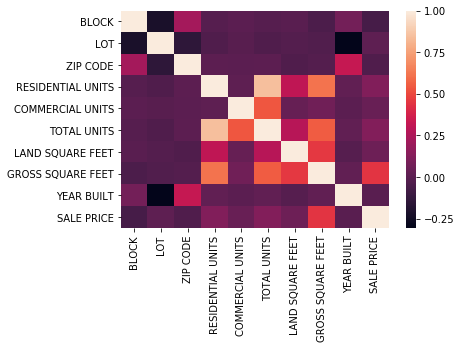

In [68]:
# correlation between the features
corr = data.corr()
sns.heatmap(corr)

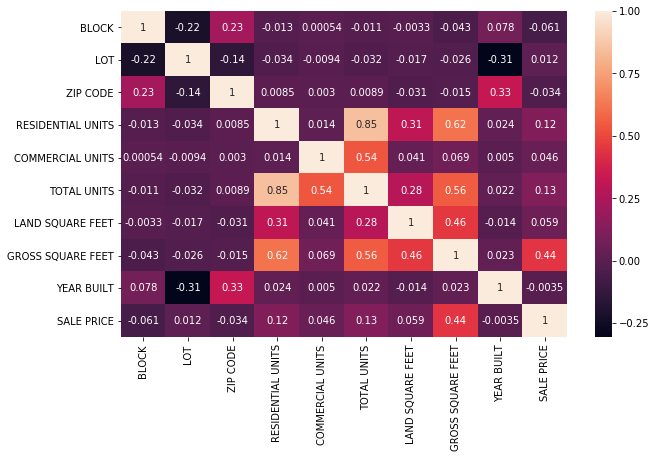

In [69]:
# Get All Correlation Coefficients
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data.corr(), ax=ax, annot=True)

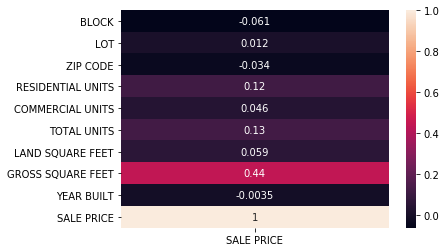

In [70]:
#Get Correlation to Target Variable
corr = data.corr()[['SALE PRICE']]
sns.heatmap(corr, annot=True)

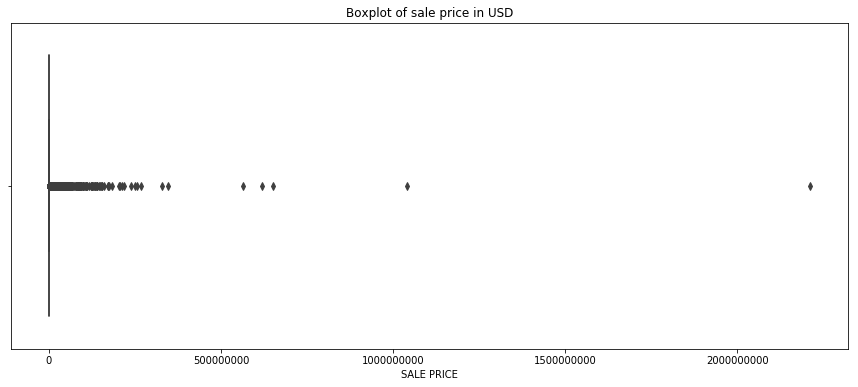

In [75]:
# sale price 
plt.figure(figsize=(15, 6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of sale price in USD')
plt.show()

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


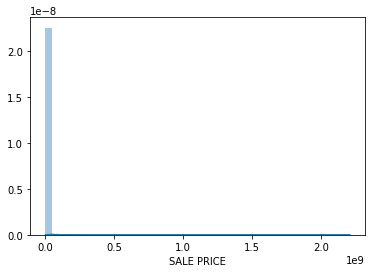

In [76]:
sns.distplot(data['SALE PRICE'])

In [77]:
# remove obsevations that fall outside 
data = data[(data['SALE PRICE']>100000) & (data['SALE PRICE']< 5000000)]

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


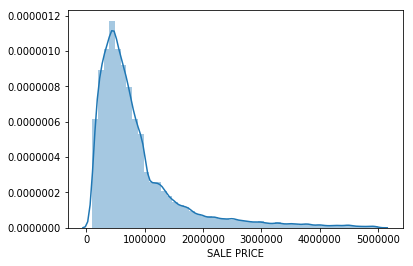

In [78]:
sns.distplot(data['SALE PRICE'])

In [79]:
# skewness of sale price
data['SALE PRICE'].skew()
# When the value of the skewness is negative/positive 
#the tail of the distribution is longer towards the left/right hand side of the curve.
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#If the skewness is less than -1 (negative , tail longer to left)
#or greater than 1(positive, tail longer to the right), the data are highly skewed

2.3446374221747437

SALE PRICE is highly right skewed. So, we will log transform it so that it give better results.

0.1989281802313763


/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


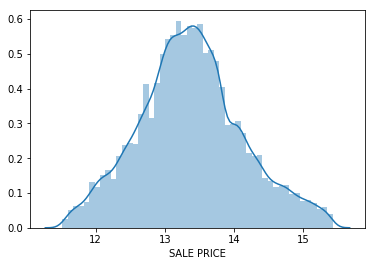

In [81]:
sales = np.log(data['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

# visualization of numerical data

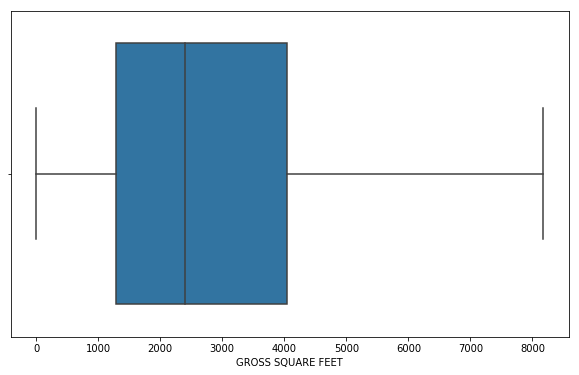

In [84]:
# square feet
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=data, showfliers=False)

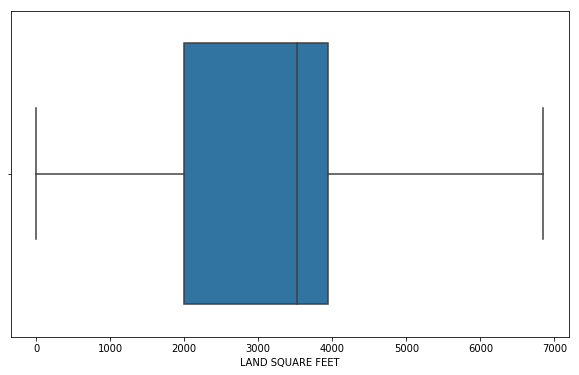

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=data, showfliers=False)

In [86]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


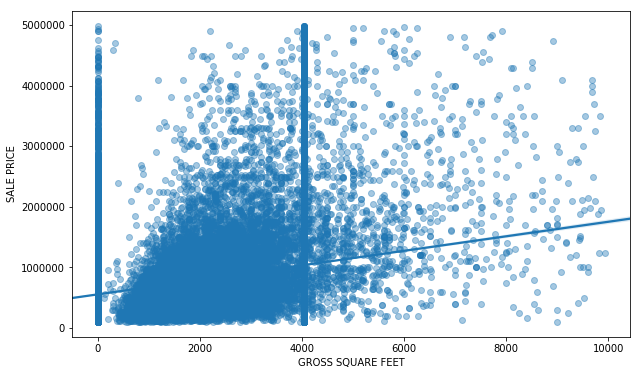

In [95]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, 
           scatter_kws={'alpha':0.4})

/home/muna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


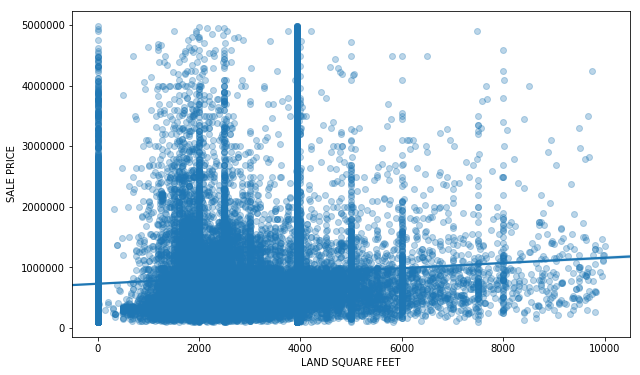

In [100]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data , scatter_kws={'alpha': 0.3})

In [101]:
data[['TOTAL UNITS', 'SALE PRICE']].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by
='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,24620
0,0,15500
2,2,9492
3,3,2723
4,4,696
6,6,362
5,5,170
8,8,134
7,7,71
9,9,56


Removing rows with TOTAL UNITS == 0 and one outlier with 2261 units

In [102]:
data = data[(data['TOTAL UNITS'] > 0) & (data['TOTAL UNITS'] != 2261)]

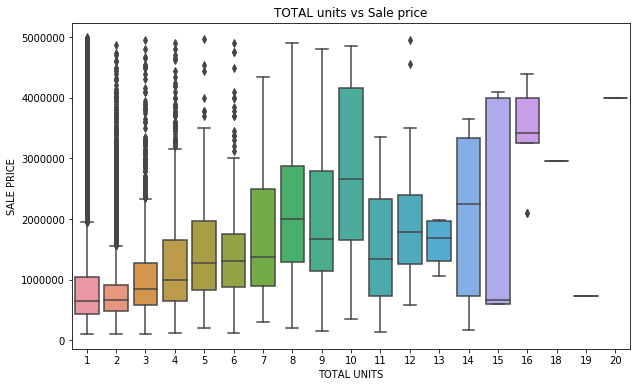

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=data)
plt.title('TOTAL units vs Sale price')
plt.show()

# visualization of categorial data

In [104]:
cat_data = data.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,38419,38419,38419,38419,38419,38419,38419,38419,38419
unique,5,247,36,9,104,30426,2642,3,104
top,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,R4,131-05 40TH ROAD,,1,R4
freq,12617,1676,12243,24026,8931,209,26452,25258,8935


In [105]:
# tax class at present
data['TAX CLASS AT PRESENT'].unique()

[2B, 2, 2A, 2C, 4, 1C, 1, 1A, 1B]
Categories (9, object): [2B, 2, 2A, 2C, ..., 1C, 1, 1A, 1B]

In [108]:
pivot = data.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT PRESENT,
1,592750.0
1A,390000.0
1B,640606.5
1C,958668.0
2,980000.0
2A,1200000.0
2B,1835000.0
2C,835000.0
4,1041598.0


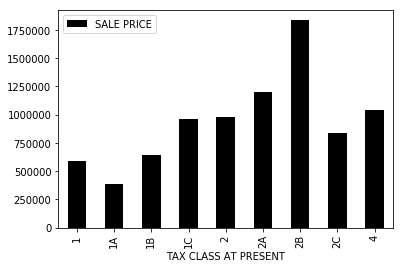

In [110]:
pivot.plot(kind='bar', color='black')

# Data pre processing

In [111]:
del data['ADDRESS']
del data['APARTMENT NUMBER']

In [112]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.000000,6794.000000,1913,2,C4,3936272.0
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,10009,8,0,8,1750.000000,4226.000000,1920,2,C4,3192840.0
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,10009,1,0,1,3941.675775,4045.707479,0,2,R2,620000.0
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,10009,1,0,1,3941.675775,4045.707479,1920,2,R4,762669.0
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,10009,1,0,1,3941.675775,4045.707479,1920,2,R4,772851.0


Normalising and Transforming Numerical columns

In [114]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
3,402,21,10009,10,0,10,2272.000000,6794.000000,1913,3936272.0
6,406,32,10009,8,0,8,1750.000000,4226.000000,1920,3192840.0
76,386,1002,10009,1,0,1,3941.675775,4045.707479,0,620000.0
79,373,1003,10009,1,0,1,3941.675775,4045.707479,1920,762669.0
80,373,1004,10009,1,0,1,3941.675775,4045.707479,1920,772851.0
81,373,1005,10009,1,0,1,3941.675775,4045.707479,1920,1034880.0
85,373,1009,10009,1,0,1,3941.675775,4045.707479,1920,800000.0
86,373,1011,10009,1,0,1,3941.675775,4045.707479,1920,2295759.0
87,375,1004,10009,1,0,1,3941.675775,4045.707479,0,875000.0
95,378,1008,10009,1,0,1,3941.675775,4045.707479,2014,701341.0


In [115]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [119]:
# transform the numeric features using log(x+1)
from scipy.stats import skew
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [122]:
scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
    data[col] = scaled[: ,i]

In [123]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.551872,-0.871059,C4,-1.441881,4.725164,-0.20439,4.895616,-0.340876,3.136375,0.176507,2,C4,2.478631
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.544061,-0.653863,C4,-1.441881,4.108378,-0.20439,4.243918,-0.675088,1.359975,0.191124,2,C4,2.174649
76,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,-1.583914,1.175049,R2,-1.441881,-0.514594,-0.20439,-0.640722,0.728141,1.235258,-3.818040,2,R2,-0.205444
79,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.610939,1.175583,R4,-1.441881,-0.514594,-0.20439,-0.640722,0.728141,1.235258,0.191124,2,R4,0.095315
80,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,-1.610939,1.176116,R4,-1.441881,-0.514594,-0.20439,-0.640722,0.728141,1.235258,0.191124,2,R4,0.114574


In [124]:
#Dropping few columns
del data['BUILDING CLASS AT PRESENT']
del data['BUILDING CLASS AT TIME OF SALE']
del data['NEIGHBORHOOD']

In [125]:
# make one hot column
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']

In [128]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38419 entries, 3 to 84545
Data columns (total 56 columns):
BOROUGH_1                                                               38419 non-null uint8
BOROUGH_2                                                               38419 non-null uint8
BOROUGH_3                                                               38419 non-null uint8
BOROUGH_4                                                               38419 non-null uint8
BOROUGH_5                                                               38419 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         38419 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         38419 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       38419 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           38419 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [129]:
# Replacing categorical columns with dummies
new_data = data.drop(one_hot_features, axis=1)
new_data = pd.concat([new_data, one_hot_encoded], axis=1)

In [130]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38419 entries, 3 to 84545
Data columns (total 66 columns):
BLOCK                                                                   38419 non-null float64
LOT                                                                     38419 non-null float64
ZIP CODE                                                                38419 non-null float64
RESIDENTIAL UNITS                                                       38419 non-null float64
COMMERCIAL UNITS                                                        38419 non-null float64
TOTAL UNITS                                                             38419 non-null float64
LAND SQUARE FEET                                                        38419 non-null float64
GROSS SQUARE FEET                                                       38419 non-null float64
YEAR BUILT                                                              38419 non-null float64
SALE PRICE                          

# train , test split

In [132]:
y_new_data = new_data['SALE PRICE']
X_new_data = new_data.drop('SALE PRICE', axis=1)
X_new_data.shape , y_new_data.shape

((38419, 65), (38419,))

In [134]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_new_data , y_new_data, test_size = 0.3 , random_state =34)

In [136]:
X_train.shape, Y_train.shape

((26893, 65), (26893,))

In [137]:
X_test.shape, Y_test.shape

((11526, 65), (11526,))

# Modelling

In [138]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [139]:
# linear regression
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
rmse(Y_test, y_pred)

0.7481061955790144

In [140]:
# lasso regresssion
alpha = 0.00099
lasso_reg = Lasso(alpha, max_iter=50000)
lasso_reg.fit(X_train, Y_train)
y_pred = lasso_reg.predict(X_test)
rmse(Y_test, y_pred)

0.7512322232419412

In [141]:
# random forest regressor
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

0.5789908849185469

We can see that Random Forest Regressor works best for this dataset with RSME score of 0.578